In [74]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm
from itertools import chain
from functools import reduce

from trajectory.planner import Segment, SegmentList, Joint

,t,x,y
count,1.033326e+06,1.033326e+06,1.033326e+06
mean,2.066644e+00,0.000000e+00,-4.838744e-06
std,1.193178e+00,1.704176e-01,1.704034e-01
min,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.033325e+00,0.000000e+00,0.000000e+00
50%,2.066646e+00,0.000000e+00,0.000000e+00
75%,3.099967e+00,0.000000e+00,0.000000e+00
max,4.133288e+00,1.000000e+00,1.000000e+00


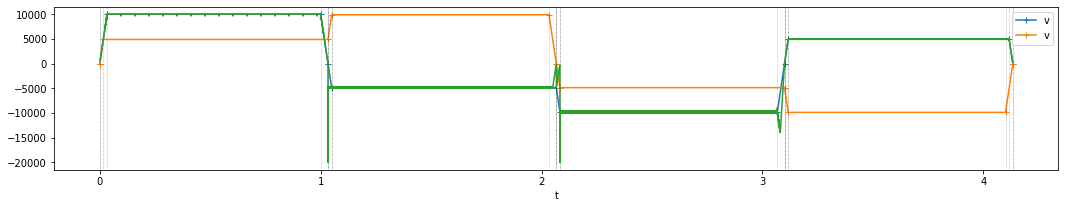

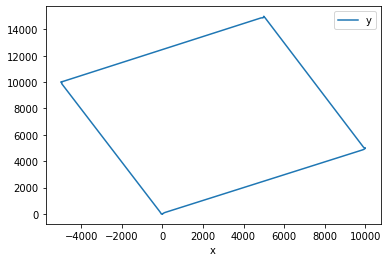

In [135]:
def seg_step(sl):
    """Produce a dataset by stepping through a segment list"""
    from trajectory.stepper import DEFAULT_PERIOD, TIMEBASE
    
    df= None
    for s in sl:
        f = pd.DataFrame(list(s.stepper()),columns=columns)
        assert f.t.max() <= s.time, (f.t.max(), s.time)
        if df is None:
            df= f
        else:
            f['t'] += df['t'].max()
            df = pd.concat([df, f])
        
    return df.reset_index(drop=True)

def step_plot(sl):
    """ Plot the first two axes of a stepper dataset, generated froma SegmentList, 
    as a 2D plot"""
    df = seg_step(sl).cumsum()
    df.plot('x','y')
 
def step_v_plot(sl, ax=None):
    """Create a strip plot of the velocity profile of the first ais of SegmentList"""
    
    df['x'] = seg_step(sl)['x']
    
    t = df[['t','x']]
    t = t[t.x != 0]
    v = (1/t.t.diff()).to_frame('v')
    t = t.join(v)
    t['v'] = t.v * t.x # Sets direction 
    t['v'] = t.v.clip(-20_000,20_000)
    t = t[t.v < sl.joints[0].v_max+100]
    t.set_index('t').v.plot(ax=ax)
    
    
j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 10000

sl.move([x,x/2])
sl.move([-x/2,x])
sl.move([-x,-x/2])
sl.move([x/2,-x])

df = seg_step(sl)

sl.time, df.t.max()
df.head()

df = seg_step(sl)
ax = sl.plot()
step_v_plot(sl, ax)


step_plot(sl) 
df.describe()

In [106]:
df.describe()

,t,x,y
count,1.033326e+06,1.033326e+06,1.033326e+06
mean,2.066644e+00,2.903730e-02,2.903246e-02
std,1.193178e+00,1.679112e-01,1.678976e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.033325e+00,0.000000e+00,0.000000e+00
50%,2.066646e+00,0.000000e+00,0.000000e+00
75%,3.099967e+00,0.000000e+00,0.000000e+00
max,4.133288e+00,1.000000e+00,1.000000e+00


/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 1 discontinuities in axis 1
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")


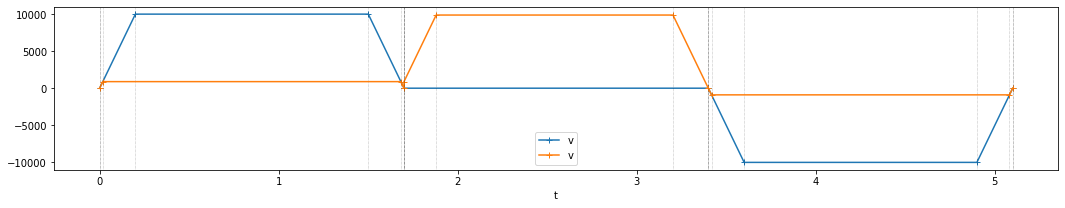

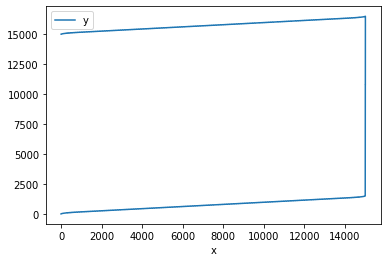

In [64]:
j = Joint(10_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 15000

sl.move([x,x/10])
sl.move([10,x])
sl.move([-x,-x/10])
sl.plot()
step_plot(sl) 


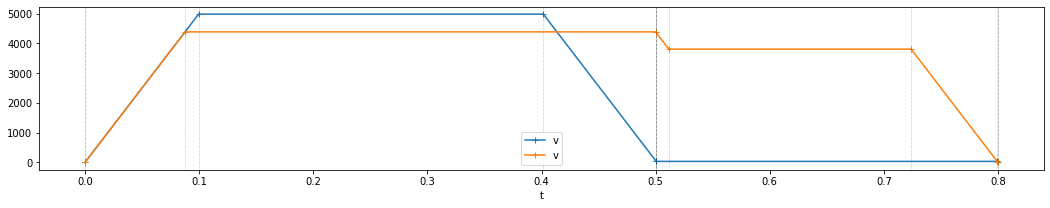

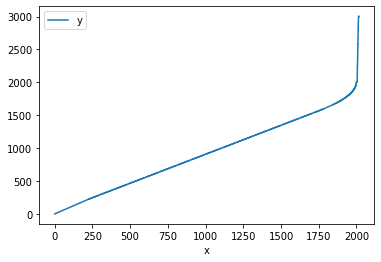

In [8]:


j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 2000
sl.move([x,x])
sl.move([10,1000])

sl.plot()
step_plot(sl)  

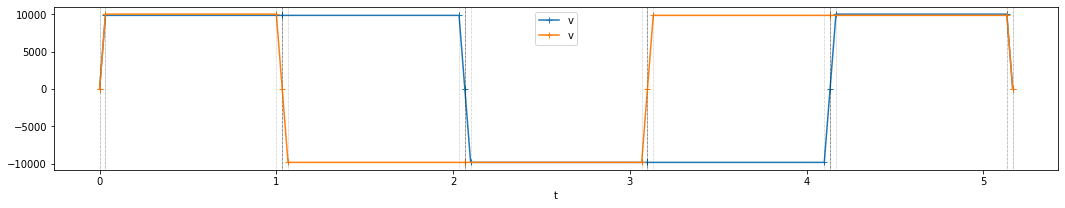

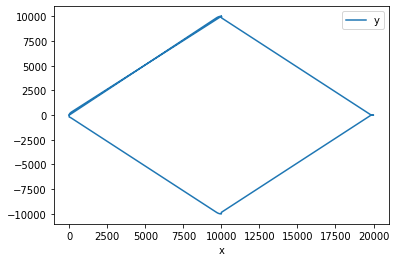

In [133]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([x,-x])
sl.move([-x,-x])
sl.move([-x,x])
sl.move([x,x])
 
sl.plot()
step_plot(sl) 

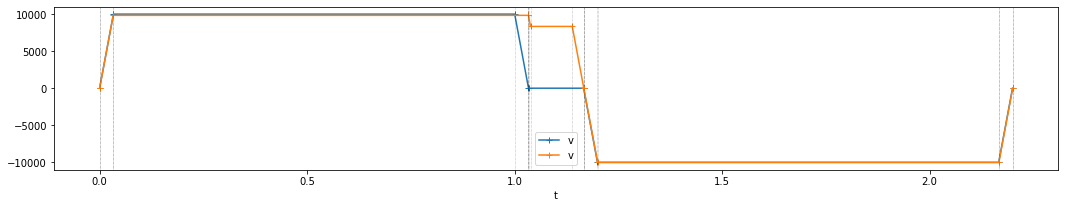

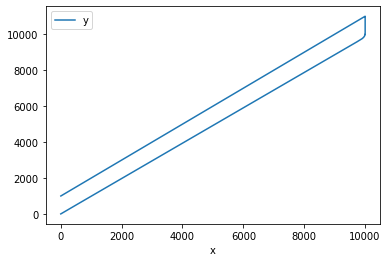

In [132]:
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([1,1000])
sl.move([-x,-x])
 
sl.plot()
step_plot(sl) 

/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 2 discontinuities in axis 0
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")
/Users/eric/Documents/proj/trajectory/trajectory/plot.py:56: UserWarning: Found 2 discontinuities in axis 1
  warn(f"Found {discontinuities[0]} discontinuities in axis {axis}")


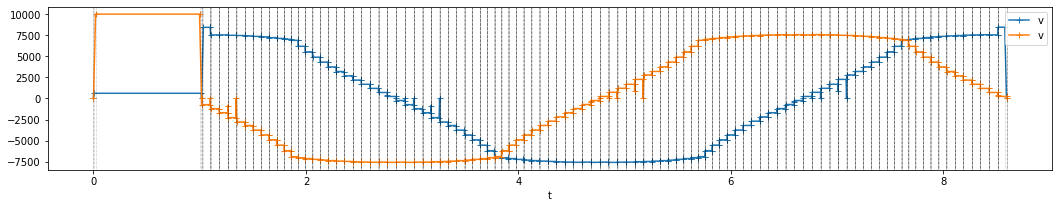

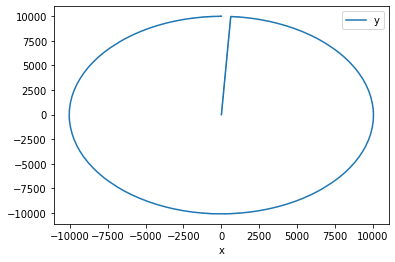

In [12]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint

from trajectory.plot import * 


j = Joint(10_000, 500_000)
joints = [j]*2

sl = SegmentList(joints)   
r = 10000
n = 100
lx  = 0
ly = 0
for i in range(1,n+1):
    a = 2*np.pi*(i/n)
    x = sin(a)*r 
    y = cos(a)*r 
    if sqrt(x**2+y**2) > 1000:
        sl.move((round(x-lx),round(y-ly)))
        lx = x
        ly = y


sl.plot()
step_plot(sl)

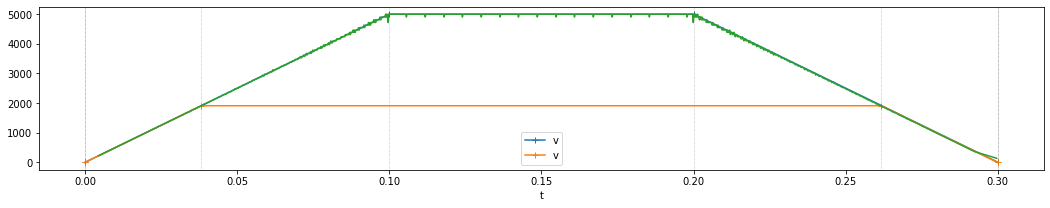

In [67]:
#
# Calculate velocity profile directly from steps
#
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 1000

sl.move([x,x/2])
#sl.move([x/2,x])

ax = sl.plot()



step_v_plot(sl)

In [31]:
df.t.max(), sl.time

(1.131484, 0.300065)

In [99]:
np.log10(100_000)/np.log10(2)

16.609640474436812

In [131]:
from trajectory.stepper import Stepper

s = Stepper(-200, 1000,0, 4)
l  = [e for e in s]
pd.Series(l).describe()

HERE
HERE 2


count    41392.000000
mean        -0.004832
std          0.069344
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
dtype: float64